# GPT-2

In [14]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Sample examples with explanations, predictions and scores

In [15]:
data_save_dir = "/cluster/home/kamara/syntax-shap/data"
batch_size = 64

dataset = "rocstories"
model_name = "gpt2"
threshold_ = 0.5


filter_ids_path = os.path.join(data_save_dir, f"{dataset}")
with open(os.path.join(filter_ids_path, f"{dataset}_{model_name}_stats.pkl"), "rb") as f:
    stats = pickle.load(f)

print("Size of the dataset:", stats["n_data"])
print("Size of filtered dataset:", stats["n_filtered"])
print("Maximum number of batches:", stats["n_filtered"]//batch_size)

Size of the dataset: 2275
Size of filtered dataset: 1318
Maximum number of batches: 20


In [6]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/explanations/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-4]
            model_name = parts[-3]
            algorithm = parts[-2]
            seed = parts[-1].split('.pkl')[0]  # Removes the file extension
           
            # Construct the full file path
            file_path = os.path.join(folder_path, file)

            # Read the pickle file
            with open(full_path, 'rb') as file:
                data = pickle.load(file)

            # Assuming the content is a dictionary, create a DataFrame
            df = pd.DataFrame(data)
            # Add the extracted details as new columns
            df['algorithm'] = algorithm
            df['n_token'] = df['input'].str.split().apply(len)
            df['explanation'] = df['explanation'].apply(lambda x: x.reshape(-1))

            # Append to the list of dataframes
            df_list.append(df)

# Concatenate all dataframes in the list
df_explanation = pd.concat(df_list, ignore_index=True)
df_explanation


,input_id,input,explanation,algorithm,n_token
0,1441,Most books are published in English and,"[18337.0, 9203.0, -19953.0, -21503.0, 48442.0,...",partition,7
1,2587,Some families pass objects and ideas down from...,"[1072.0, -438.0, -5389.0, 5123.0, -1618.0, 102...",partition,10
2,3591,Some scientists drill ice cores to find out ab...,"[-9147.0, -12003.0, 10770.0, 20732.0, -9208.0,...",partition,12
3,378,Blocks are meant to be,"[1712.0, 24.0, 49929.0, 47509.0, -49475.0]",partition,5
4,2697,Ghost lights can be close to ground or in the,"[-7293.0, 11059.0, 5674.0, -700.0, 18186.0, -1...",partition,10
...,...,...,...,...,...
6717,2619,Light can go around the earth three times in one,"[0.10020294904085483, 0.10675048700362903, 0.0...",syntax,10
6718,2841,Capital goods are goods which are necessary fo...,"[0.05886052553455758, 0.0026913616576367118, 0...",syntax,10
6719,271,Thunder is made when lightning,"[0.12553044080713605, 0.024053866805230795, 0....",syntax,5
6720,505,More reactive acids are often more,"[0.18326838398870804, 0.12701752098068397, 0.1...",syntax,6


In [7]:
#### Select rows which input_ids are in the list of input_ids of the rows with algorithm = 'shap'

# Extract input_id values where algorithm is 'shap'
shap_input_ids = df_explanation[df_explanation['algorithm'] == 'shap']['input_id'].unique()

# Filter the DataFrame to keep rows where input_id is in shap_input_ids
filtered_df_explanation = df_explanation[df_explanation['input_id'].isin(shap_input_ids)]
filtered_df_explanation

,input_id,input,explanation,algorithm,n_token
0,1441,Most books are published in English and,"[18337.0, 9203.0, -19953.0, -21503.0, 48442.0,...",partition,7
1,2587,Some families pass objects and ideas down from...,"[1072.0, -438.0, -5389.0, 5123.0, -1618.0, 102...",partition,10
2,3591,Some scientists drill ice cores to find out ab...,"[-9147.0, -12003.0, 10770.0, 20732.0, -9208.0,...",partition,12
3,378,Blocks are meant to be,"[1712.0, 24.0, 49929.0, 47509.0, -49475.0]",partition,5
4,2697,Ghost lights can be close to ground or in the,"[-7293.0, 11059.0, 5674.0, -700.0, 18186.0, -1...",partition,10
...,...,...,...,...,...
6653,2577,Every round starts with both teams spawning at...,"[0.08207963213626256, 0.020277295555753725, 0....",syntax,10
6654,4296,Some people use mathematics to make visionary ...,"[0.04541181513746273, 0.03933105329327422, 0.0...",syntax,13
6655,3070,Ice hockey is one of the most popular sports i...,"[0.0010929091826351153, 0.0046906480595258464,...",syntax,11
6656,3465,People think it is one of the most beautiful u...,"[0.03492257711622961, 0.0337760339493351, 0.02...",syntax,11


In [21]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if eval(threshold) == threshold_:
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final_single_threshold = pd.concat(df_list, ignore_index=True)
df_final_single_threshold


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,algorithm,n_token
0,0.064883,0.064883,0.064883,-11.080358,0.3,0.669948,1488,He became very anxious and put tons of differe...,partition,12
1,0.039515,0.039515,0.030856,-10.584456,0.0,0.495188,1455,Sam got on and they went into the hills for th...,partition,12
2,0.010980,0.042436,0.067958,-0.979325,0.5,0.563315,1221,She was now stuck with lime green as her new wall,partition,11
3,0.013044,0.005602,0.013044,-0.561141,0.4,0.485089,2107,I found I was able to punt the ball very far a...,partition,15
4,0.744372,0.737913,0.744372,-4.746901,0.2,0.903352,486,Her current car was in really bad,partition,7
...,...,...,...,...,...,...,...,...,...,...
6484,0.032062,-0.034015,0.032062,0.723125,0.1,0.610671,494,He felt a sharp pain in his,syntax,7
6485,0.596255,0.471976,0.682724,-1.175424,0.7,0.284335,1964,I took her to the vet to figure out what was g...,syntax,14
6486,0.722801,0.781863,0.837870,-2.598089,0.2,0.813315,2006,On a day off I took a step that forever change...,syntax,15
6487,0.137971,0.128098,0.137971,-2.637080,0.0,0.734142,633,He noticed an empty field outside of his,syntax,8


In [20]:
sample = pd.merge(filtered_df_explanation, df_final_single_threshold, on=['input', 'input_id', 'algorithm', 'n_token'])
df_str = pd.read_csv(f"/cluster/home/kamara/syntax-shap/data/{dataset}/{dataset}_{model_name}_{seed}_predictions.csv")
sample_with_y = pd.merge(sample, df_str, on=['input', 'input_id'])
#sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

In [21]:
sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

### N_tokens vs performance

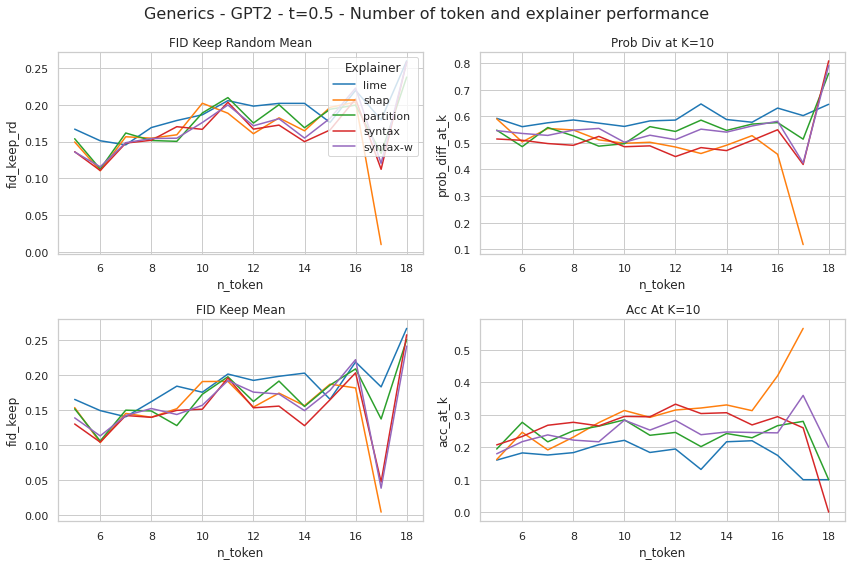

In [17]:
df = df_final_single_threshold.groupby(['algorithm', 'n_token']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Explainer', loc='upper right')

fig.suptitle('Generics - GPT2 - t=0.5 - Number of token and explainer performance', fontsize=16)

plt.tight_layout()
plt.show()

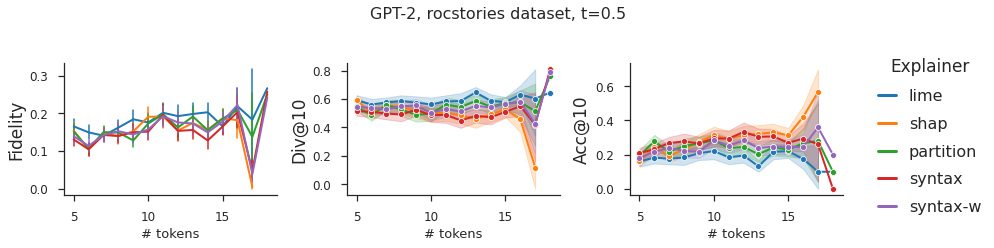

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final_single_threshold#.groupby(['algorithm']).reset_index()#.mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)


fig, axes = plt.subplots(1, 3, figsize=(14,3.5))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=palette, linewidth=2, errorbar='se', err_style='bars')
axes[0].set_title('')
axes[0].set_xlabel('# tokens', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=palette, linewidth=2, markers=True, marker='o')
axes[1].set_title('')
axes[1].set_xlabel('# tokens', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=palette, linewidth=2, markers=True, marker='o')
axes[2].set_title('')
axes[2].set_xlabel('# tokens', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
legend = axes[2].legend(title='Explainer', loc='upper left', bbox_to_anchor=(1.1, 1.15), fontsize=16, frameon=False, handlelength=1.1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(3)  # Increase line width in legend

fig.suptitle(f'GPT-2, {dataset} dataset, t={threshold_}', fontsize=16)  # Adjust suptitle position

sns.despine()
plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/n_token_vs_perf_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)


### Performance at Thresholds

In [11]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            # Construct the full file path
            file_path = os.path.join(folder_path, file)

            # Read the pickle file
            with open(full_path, 'rb') as file:
                data = pickle.load(file)

            # Assuming the content is a dictionary, create a DataFrame
            df = pd.DataFrame(data)

            # Add the extracted details as new columns
            df['algorithm'] = algorithm
            df['n_token'] = df['input'].str.split().apply(len)
            df['threshold'] = eval(threshold)

            # Append to the list of dataframes
            df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,algorithm,n_token,threshold
0,0.016389,0.011429,0.004086,-1.195015,0.0,0.551654,331,Yet to his dismay he was,partition,6,0.8
1,0.055134,0.055134,0.055134,-10.917542,0.0,0.751951,70,Kate decided to hold it,partition,5,0.8
2,0.090605,0.098550,0.226383,-0.571498,0.7,0.353315,223,She went up to talk to,partition,6,0.8
3,0.084039,0.059825,0.160864,-0.465050,0.8,0.029213,1913,When he got out of bed he noticed a jar of coo...,partition,14,0.8
4,-0.005591,-0.001319,0.006373,0.188043,1.0,-0.014037,1101,Jeff waited a few months before getting back o...,partition,10,0.8
...,...,...,...,...,...,...,...,...,...,...,...
58396,0.007467,0.011301,0.024209,-0.434566,0.0,0.690475,494,He felt a sharp pain in his,syntax,7,0.3
58397,0.681677,0.631760,0.663948,-2.594967,0.4,0.657725,1964,I took her to the vet to figure out what was g...,syntax,14,0.3
58398,0.831642,0.830018,0.793912,-4.050736,0.2,0.937411,2006,On a day off I took a step that forever change...,syntax,15,0.3
58399,0.118026,0.137971,0.137971,-11.834809,0.0,0.744016,633,He noticed an empty field outside of his,syntax,8,0.3


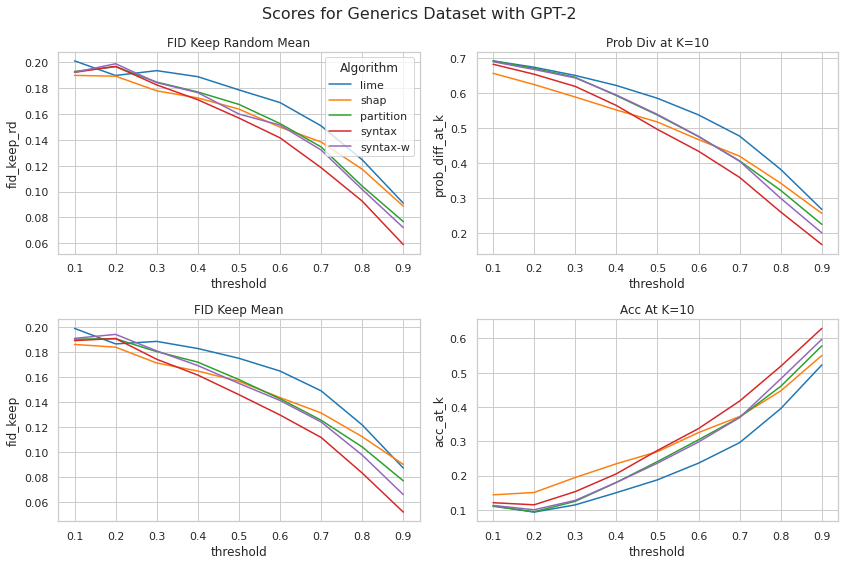

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()
# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Algorithm', loc='upper right')

fig.suptitle('Scores for Generics Dataset with GPT-2', fontsize=16)

plt.tight_layout()
plt.show()


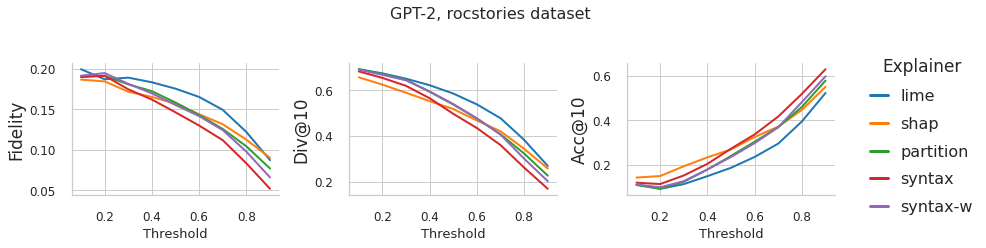

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)


fig, axes = plt.subplots(1, 3, figsize=(14,3.5))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=palette, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('Threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=palette, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('Threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=palette, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('Threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
legend = axes[2].legend(title='Explainer', loc='upper left', bbox_to_anchor=(1.1, 1.15), fontsize=16, frameon=False, handlelength=1.1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(3)  # Increase line width in legend

fig.suptitle(f'GPT-2, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)
